In [3]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;



df= pd.read_csv("C:\\Users\\User\\Desktop\\Bank_Personal_Loan_Modelling.csv");
print(df.head());

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [5]:
features=df.columns.drop("Personal Loan");
target=["Personal Loan"];

df_encode=pd.get_dummies(df[features]);
df_encode["Personal Loan"]=df["Personal Loan"];

print(df_encode.head());



   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0  


In [8]:
from sklearn.model_selection import train_test_split;

df_train,df_test=train_test_split(df_encode,test_size=0.2);
print(df_train.head());
print(df_test.head());

print(df_train.info());
print(df_test.info());


        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1036  1037   53          28      55     94720       4   0.90          1   
1747  1748   29           5      21     90717       4   0.40          2   
648    649   50          25      34     95621       1   1.30          2   
1877  1878   51          24      78     90037       1   2.67          2   
3989  3990   49          25      90     92709       4   1.40          2   

      Mortgage  Securities Account  CD Account  Online  CreditCard  \
1036       119                   0           0       1           1   
1747        89                   0           0       0           1   
648          0                   0           0       1           0   
1877         0                   0           0       1           0   
3989         0                   1           0       1           0   

      Personal Loan  
1036              0  
1747              0  
648               0  
1877              0  
3989              

In [10]:
from sklearn.linear_model import LogisticRegression;
model=LogisticRegression();
model.fit(df_train[features],df_train[target]);
print(model.score(df_train[features],df_train[target]));

0.90825


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(model.score(df_test[features],df_test[target]));

0.906


In [20]:
from sklearn.metrics import confusion_matrix;


train_pred=model.predict(df_train[features]);
test_pred=model.predict(df_test[features]);
train_conf=confusion_matrix(df_train[target],train_pred);
test_conf=confusion_matrix(df_test[target],test_pred);

print(train_conf);
train_p=train_conf[0][0] +train_conf[1][1];
train_sum=train_conf.sum();
train_acc=train_p/train_sum;


print(train_p/train_sum);



test_p=test_conf[0][0] +test_conf[1][1];
test_sum=test_conf.sum();
test_acc=test_p/test_sum;


print(test_p/test_sum);



from sklearn.metrics import classification_report;
print(classification_report(df_test[target],test_pred));

[[3503  110]
 [ 257  130]]
0.90825
0.906
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       907
          1       0.49      0.37      0.42        93

avg / total       0.90      0.91      0.90      1000



In [23]:
from sklearn.preprocessing import MinMaxScaler;
features_to_scale=["Mortgage","Income"];
scaler=MinMaxScaler();
scaled_values=scaler.fit_transform(df_encode[features_to_scale]);
df_encode["Mortgage"]=scaled_values[:,0];
df_encode["Income"]=scaled_values[:,1];
print(df_encode.head());




features=df_encode.columns.drop("Personal Loan");
target=["Personal Loan"];


df_knn_train,df_knn_test=train_test_split(df_encode,test_size=0.2);
print(df_knn_train.shape);
print(df_knn_test.shape);


   ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  0.189815     91107       4    1.6          1   
1   2   45          19  0.120370     90089       3    1.5          1   
2   3   39          15  0.013889     94720       1    1.0          1   
3   4   35           9  0.425926     94112       1    2.7          2   
4   5   35           8  0.171296     91330       4    1.0          2   

   Mortgage  Securities Account  CD Account  Online  CreditCard  Personal Loan  
0       0.0                   1           0       0           0              0  
1       0.0                   1           0       0           0              0  
2       0.0                   0           0       0           0              0  
3       0.0                   0           0       0           0              0  
4       0.0                   0           0       0           1              0  
(4000, 14)
(1000, 14)


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

[1.0, 0.92725, 0.9305, 0.91, 0.913, 0.9065, 0.90775, 0.9045, 0.905]
[1.0, 0.919, 0.922, 0.909, 0.911, 0.907, 0.907, 0.907, 0.907]


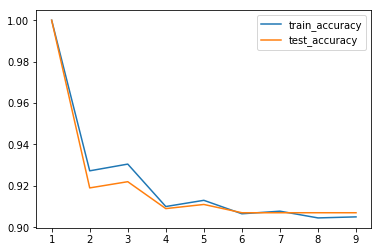

In [49]:
from sklearn.neighbors import KNeighborsClassifier;
train_acc=[];
test_acc=[];
k_val=[i for i in range(1,10)];
for k in k_val:
    model=KNeighborsClassifier(n_neighbors=k,metric="euclidean");
    model.fit(df_train[features],df_train[target]);
    train_score=model.score(df_train[features],df_train[target]);
    train_acc.append(train_score);
    model.fit(df_test[features],df_test[target]);
    test_score=model.score(df_test[features],df_test[target]);
    test_acc.append(test_score);
    
    
print(train_acc);
print(test_acc);
plt.plot(k_val,train_acc,label="train_accuracy");
plt.plot(k_val,test_acc,label="test_accuracy");
plt.legend();

In [50]:
from sklearn.svm import SVC;
model=SVC(kernel="rbf");
model.fit(df_train[features],df_train[target]);

print(model.score(df_train[features],df_train[target]));
from mlxtend.plotting import plot_decision_regions;
feat=["Mortgage","Income"];
X=np.array(df[feat]);
y=np.array(df["Personal Loan"]).ravel();
#plot_decision_regions(X,y,clf=model);
#plt.label("X");
#plt.label("Y");
#plt.legend();




G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


In [51]:
from sklearn.tree import DecisionTreeClassifier;


model=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005);
model.fit(df_train[features],df_train[target]);
print(model.score(df_train[features],df_train[target]));


print(model.score(df_test[features],df_test[target]));

train_pred=model.predict(df_train[features]);
test_pred=model.predict(df_test[features]);
train_conf=confusion_matrix(df_train[target],train_pred);
test_conf=confusion_matrix(df_test[target],test_pred);

print(train_conf);
train_p=train_conf[0][0] +train_conf[1][1];
train_sum=train_conf.sum();
train_acc=train_p/train_sum;


print(train_p/train_sum);



test_p=test_conf[0][0] +test_conf[1][1];
test_sum=test_conf.sum();
test_acc=test_p/test_sum;


print(test_p/test_sum);



from sklearn.metrics import classification_report;
print(classification_report(df_test[target],test_pred));




#from sklearn.tree import export_graphviz;
#import graphviz;


0.97925
0.984
[[3608    5]
 [  78  309]]
0.97925
0.984
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       907
          1       1.00      0.83      0.91        93

avg / total       0.98      0.98      0.98      1000



In [58]:
from sklearn.cluster import KMeans;
model=KMeans(n_clusters=2);
print(model.fit(df_train[features]));
print(model.cluster_centers_);




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[2.48968895e+03 4.55547170e+01 2.03175202e+01 7.52000000e+01
  9.14964469e+04 2.37735849e+00 1.98674933e+00 1.88463612e+00
  5.60097035e+01 1.00269542e-01 5.06738544e-02 5.88140162e-01
  2.85175202e-01]
 [2.54453846e+03 4.50578089e+01 1.98060606e+01 7.16783217e+01
  9.45916047e+04 2.43123543e+00 1.90930070e+00 1.88251748e+00
  5.41636364e+01 9.65034965e-02 6.34032634e-02 6.12121212e-01
  3.06293706e-01]]


In [63]:

df_train["cluster"] = kmeans.labels_
sns.set_style('whitegrid')




print(model.score(df_train[features],df_train[target]));
#sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_train, hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

-11218554318.691048


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
